### Griffin Lyons
### CS 550
### Final Project - Sieve of Eratosthenes

In [1]:
def naive_sieve_of_eratosthenes(upper_limit):
    """This is a function that calculates primes based on the method
    discovered by the Greek philosopher Eratosthenes. I call it
    'naive' because I have not performed any optimizations on it or
    tried to implement more sophisticated algorithmic choices as such."""
    primes_list = []
    for i in range(2,upper_limit):
        prime_counter = 0
        for j in primes_list:
            if i%j == 0:
                prime_counter += 1
        if prime_counter == 0:
            primes_list.append(i)
        else:
            pass
    return primes_list

In [2]:
#import the time module to time how fast our algorithm works
import time
time_0 = time.time()

primes_to_121_list = naive_sieve_of_eratosthenes(121)

time_1 = time.time()

total_time = time_1 - time_0
print("{:.100f}".format(time_0))
print("{:.100f}".format(time_1))
print("It took {:.500f} seconds to run the naive Sieve of Eratosthenes implementation".format(total_time))

1702587483.2749366760253906250000000000000000000000000000000000000000000000000000000000000000000000000000000000
1702587483.2749366760253906250000000000000000000000000000000000000000000000000000000000000000000000000000000000
It took 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 seconds to run the naive Sieve of Eratosthenes implementation


In [4]:
#Repeat this, but for primes up to 25000 (as an arbitrary larger number)
import time
time_0 = time.time()

primes_to_250000_list = naive_sieve_of_eratosthenes(25000)

time_1 = time.time()

total_time = time_1 - time_0
print("It took {:.5f} seconds to run the naive Sieve of Eratosthenes implementation".format(total_time))

It took 3.25131 seconds to run the naive Sieve of Eratosthenes implementation


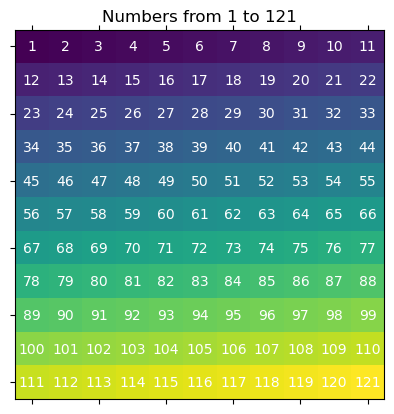

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Create an array of numbers from 1 to 121
range_numbers = np.arange(1, 122)

#Reshape the array into an 11x11 grid
range_grid = range_numbers.reshape(11, 11)

fig, ax = plt.subplots()

#We will use matshow to display the grid
cax = ax.matshow(range_grid, cmap='viridis')

#We use a loop to travel over our grid and create text annotations from it
for i in range(range_grid.shape[0]):
    for j in range(range_grid.shape[1]):
        text = ax.text(j, i, range_grid[i, j],
                       ha="center", va="center", color="w")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.title("Numbers from 1 to 121")
plt.show()

In [ ]:
#We will animate the Sieve of Eratosthenes in action 
#We will animate this with matplotlib's FuncAnimation function
from matplotlib.animation import FuncAnimation
#this following import and line of code lets me set a location necessary to
#make the animation work
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Owner\\ffmpeg.exe'

#Create an array of numbers from 1 to 121
prime_range_numbers = np.arange(1, 122, dtype=float)

#Reshape the array into an 11x11 grid
prime_range_grid = prime_range_numbers.reshape(11, 11)

#prime_range_grid[~np.isin(prime_range_grid, primes_to_121_list)] = np.nan

#Create a figure and axis
fig, ax = plt.subplots()

#Use matshow to display the grid
cax = ax.matshow(prime_range_grid, cmap='viridis')

#set tickmarks to empty so that we don't get distracting numbers outside the plot
ax.set_xticklabels([])
ax.set_yticklabels([])

#title our grid
plt.title("Prime numbers under 121")

#Loop over data dimensions and create text annotations for the number values
#create a placeholder list
texts = []
for i in range(prime_range_grid.shape[0]):
    #create placeholder within loop
    row = []
    for j in range(prime_range_grid.shape[1]):
        text = ax.text(j, i, int(prime_range_grid[i, j]),
                       ha="center", va="center", color="w")
        row.append(text)
    texts.append(row)

#remove the number 1, as it is non-composite, not prime
i_1, j_1 = np.where(prime_range_grid == 1)
ax.fill([j_1-0.5, j_1-0.5, j_1+0.5, j_1+0.5], [i_1-0.5, i_1+0.5, i_1+0.5, i_1-0.5], color='white')

#make a list of numbers not in the primes list
not_prime_list = prime_range_numbers[~np.isin(prime_range_numbers, primes_to_121_list)]

"""Only a certain number of our primes are necessary, because there are only so 
many multiples of primes under the number 121. I am doing this to reduce the 
number of frames in the animation"""

modded_primes_list = []

for i in range(0,12):
    this_prime = primes_to_121_list[i]
    modded_primes_list.append(this_prime)


"""We are also making a list of non-primes in order of their prime factors.
We are adding them twice for animation purposes. In order to show the full grid before 
'removing' non-primes, we will add two zeroes to the start of our primes list, 
because the frames argument may skip the first initial value, if I understand 
matplotlib's documentation correctly."""

#create a placeholder list
non_primes_in_factor_order_list = [0,0]

for i in range(0, len(modded_primes_list)):
    this_prime = modded_primes_list[i]
    for j in not_prime_list:
        if j%this_prime == 0:
            non_primes_in_factor_order_list.append(j)
            non_primes_in_factor_order_list.append(j)

#Now we write a function that will be called to animate the plot
def prime_animator(num):
    """This is a function that creates a plot to serve as an individual frame
    in a FuncAnimation() animation"""
    #we use the number's place in our prime number list from earlier
    this_number = non_primes_in_factor_order_list[num]
    
    multiples_list = []
    
    if this_number == 0:
        #display the grid as it exists before deletion
        cax = ax.matshow(prime_range_grid, cmap='viridis')
    else: #set this number to either red or white depending on whether it's first or second
        if num%2 == 0:
            this_color = 'red'
        else:
            this_color = 'white'
        #we are effectively removing them because they are not prime
        #first we turn the first appearance of the number red to highlight it
        #then we turn it white to render it blank
        i, j = np.where(prime_range_grid == this_number)
        ax.fill([j-0.5, j-0.5, j+0.5, j+0.5], [i-0.5, i+0.5, i+0.5, i-0.5], color=this_color)

        #Update text elements
        for i in range(prime_range_grid.shape[0]):
            for j in range(prime_range_grid.shape[1]):
                if not np.isnan(prime_range_grid[i, j]):
                    texts[i][j].set_text(int(prime_range_grid[i, j]))
                    texts[i][j].set_visible(True)
                else:
                    texts[i][j].set_visible(False)

prime_animation = FuncAnimation(fig, prime_animator, frames=len(non_primes_in_factor_order_list))

#save the animation; we pick 1 as our frames per second ratio to be able to see the effect
prime_animation.save('sieve_of_eratosthenes_draft_4.mp4', writer = 'ffmpeg', fps = 15)

#Show the plot
plt.show()

In [ ]:
"""This was my third major attempt at an animation. I still didn't like it."""

#We will animate the Sieve of Eratosthenes in action 
#We will animate this with matplotlib's FuncAnimation function
from matplotlib.animation import FuncAnimation
#this following import and line of code lets me set a location necessary to
#make the animation work
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Owner\\ffmpeg.exe'

#Create an array of numbers from 1 to 121
prime_range_numbers = np.arange(1, 122, dtype=float)

#Reshape the array into an 11x11 grid
prime_range_grid = prime_range_numbers.reshape(11, 11)

#prime_range_grid[~np.isin(prime_range_grid, primes_to_121_list)] = np.nan

#Create a figure and axis
fig, ax = plt.subplots()

#Use matshow to display the grid
cax = ax.matshow(prime_range_grid, cmap='viridis')

#set tickmarks to empty so that we don't get distracting numbers
ax.set_xticklabels([])
ax.set_yticklabels([])

#title our grid
plt.title("Prime numbers under 121")

#Loop over data dimensions and create text annotations for the number values
#create a placeholder list
texts = []
for i in range(prime_range_grid.shape[0]):
    #create placeholder within loop
    row = []
    for j in range(prime_range_grid.shape[1]):
        text = ax.text(j, i, int(prime_range_grid[i, j]),
                       ha="center", va="center", color="w")
        row.append(text)
    texts.append(row)

#remove the number 1, as it is non-composite, not prime
i, j = np.where(prime_range_grid == 1)
ax.fill([j-0.5, j-0.5, j+0.5, j+0.5], [i-0.5, i+0.5, i+0.5, i-0.5], color='white')

#make a list of numbers not in the primes list
not_prime_list = prime_range_numbers[~np.isin(prime_range_numbers, primes_to_121_list)]

"""In order to show the full grid before 'removing' non-primes, we will add
two zeroes to the start of our primes list, because the frames argument may skip 
the first initial value, if I understand matplotlib's documentation correctly"""

modded_primes_list = [0,0]

"""Only a certain number of our primes are necessary, because there are only so 
many multiples of primes under the number 121. I am doing this to reduce the 
number of frames in the """
for i in range(0,12):
    this_prime = primes_to_121_list[i]
    modded_primes_list.append(this_prime)

#Now we write a function that will be called to animate the plot
def prime_animator(num):
    """This is a function that creates a plot to serve as an individual frame
    in a FuncAnimation() animation"""
    #we use the number's place in our prime number list from earlier
    this_number = modded_primes_list[num]
    
    multiples_list = []
    
    if this_number == 0:
        #display the grid as it exists before deletion
        cax = ax.matshow(prime_range_grid, cmap='viridis')
    else:
        for w in not_prime_list:
            if w%this_number == 0:
                multiples_list.append(w)
            else:
                pass
        #set all multiples of this prime to be white
        #we are effectively removing them because they are not prime
        for z in multiples_list:
            i, j = np.where(prime_range_grid == z)
            ax.fill([j-0.5, j-0.5, j+0.5, j+0.5], [i-0.5, i+0.5, i+0.5, i-0.5], color='white')

        #Update text elements
        for i in range(prime_range_grid.shape[0]):
            for j in range(prime_range_grid.shape[1]):
                if not np.isnan(prime_range_grid[i, j]):
                    texts[i][j].set_text(int(prime_range_grid[i, j]))
                    texts[i][j].set_visible(True)
                else:
                    texts[i][j].set_visible(False)

prime_animation = FuncAnimation(fig, prime_animator, frames=len(modded_primes_list))

#save the animation; we pick 1 as our frames per second ratio to be able to see the effect
prime_animation.save('sieve_of_eratosthenes_draft_3.mp4', writer = 'ffmpeg', fps = 1)

#Show the plot
plt.show()

In [ ]:
"""This was my second draft at trying to write an animation - I was trying to show
the sieve removing multiples of primes in succession"""
#We will animate the Sieve of Eratosthenes in action 
#We will animate this with matplotlib's FuncAnimation function
from matplotlib.animation import FuncAnimation
#this following import and line of code lets me set a location necessary to
#make the animation work
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Owner\\ffmpeg.exe'

#Create an array of numbers from 1 to 121
prime_range_numbers = np.arange(1, 122, dtype=float)

#Reshape the array into an 11x11 grid
prime_range_grid = prime_range_numbers.reshape(11, 11)

#prime_range_grid[~np.isin(prime_range_grid, primes_to_121_list)] = np.nan

#Create a figure and axis
fig, ax = plt.subplots()

#Use matshow to display the grid
cax = ax.matshow(prime_range_grid, cmap='viridis')

#set tickmarks to empty so that we don't get distracting numbers
ax.set_xticklabels([])
ax.set_yticklabels([])

#title our grid
plt.title("Prime numbers under 121")

#Loop over data dimensions and create text annotations for the number values
#create a placeholder list
texts = []
for i in range(prime_range_grid.shape[0]):
    #create placeholder within loop
    row = []
    for j in range(prime_range_grid.shape[1]):
        text = ax.text(j, i, int(prime_range_grid[i, j]),
                       ha="center", va="center", color="w")
        row.append(text)
    texts.append(row)

#make a list of numbers not in the primes list
not_prime_list = prime_range_numbers[~np.isin(prime_range_numbers, primes_to_121_list)]

#Now we write a function that will be called to animate the plot
def prime_animator(num):
    """This is a function that creates a plot to serve as an individual frame
    in a FuncAnimation() animation"""
    #we use the number's place in our prime number list from earlier
    this_number = primes_to_121_list[num]
    
    multiples_list = []
    for w in not_prime_list:
        if w%this_number == 0:
            multiples_list.append(w)
        else:
            pass
    #set all multiples of this prime to be white
    #we are effectively removing them because they are not prime
    for z in multiples_list:
        i, j = np.where(prime_range_grid == z)
        ax.fill([j-0.5, j-0.5, j+0.5, j+0.5], [i-0.5, i+0.5, i+0.5, i-0.5], color='white')

    #Update text elements
    for i in range(prime_range_grid.shape[0]):
        for j in range(prime_range_grid.shape[1]):
            if not np.isnan(prime_range_grid[i, j]):
                texts[i][j].set_text(int(prime_range_grid[i, j]))
                texts[i][j].set_visible(True)
            else:
                texts[i][j].set_visible(False)

prime_animation = FuncAnimation(fig, prime_animator, frames=len(primes_to_121_list))

#save the animation
prime_animation.save('sieve_of_eratosthenes_draft_2.mp4', writer = 'ffmpeg', fps = 1)

#Show the plot
plt.show()

In [ ]:
"""This is the original animation code i wrote for demonstrating the sieve.
It didn't do a very good job."""
#We will animate the Sieve of Eratosthenes in action 
#We will animate this with matplotlib's FuncAnimation function
from matplotlib.animation import FuncAnimation
#this following import and line of code lets me set a location necessary to
#make the animation work
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Owner\\ffmpeg.exe'

#Create an array of numbers from 1 to 121
prime_range_numbers = np.arange(1, 122, dtype=float)

#Reshape the array into an 11x11 grid
prime_range_grid = prime_range_numbers.reshape(11, 11)

#prime_range_grid[~np.isin(prime_range_grid, primes_to_121_list)] = np.nan

#Create a figure and axis
fig, ax = plt.subplots()

#Use matshow to display the grid
cax = ax.matshow(prime_range_grid, cmap='viridis')

#set tickmarks to empty so that we don't get distracting numbers
ax.set_xticklabels([])
ax.set_yticklabels([])

#title our grid
plt.title("Prime numbers under 121")

#Loop over data dimensions and create text annotations for the number values
#create a placeholder list
texts = []
for i in range(prime_range_grid.shape[0]):
    #create placeholder within loop
    row = []
    for j in range(prime_range_grid.shape[1]):
        text = ax.text(j, i, int(prime_range_grid[i, j]),
                       ha="center", va="center", color="w")
        row.append(text)
    texts.append(row)


#make a list of numbers not in the primes list
not_prime_list = prime_range_numbers[~np.isin(prime_range_numbers, primes_to_121_list)]

#Now we write a function that will be called to animate the plot
def prime_animator(num):
    """This is a function that creates a plot to serve as an individual frame
    in a FuncAnimation() animation"""

    #blank out the current number with a white rectangle
    this_number = not_prime_list[num]
    i, j = np.where(prime_range_grid == this_number)
    ax.fill([j-0.5, j-0.5, j+0.5, j+0.5], [i-0.5, i+0.5, i+0.5, i-0.5], color='white')
    
    #Update text elements
    for i in range(prime_range_grid.shape[0]):
        for j in range(prime_range_grid.shape[1]):
            if not np.isnan(prime_range_grid[i, j]):
                texts[i][j].set_text(int(prime_range_grid[i, j]))
                texts[i][j].set_visible(True)
            else:
                texts[i][j].set_visible(False)

prime_animation = FuncAnimation(fig, prime_animator, frames=len(not_prime_list))

#save the animation
prime_animation.save('sieve_of_eratosthenes_original.mp4', writer = 'ffmpeg', fps = 6)

#Show the plot
plt.show()